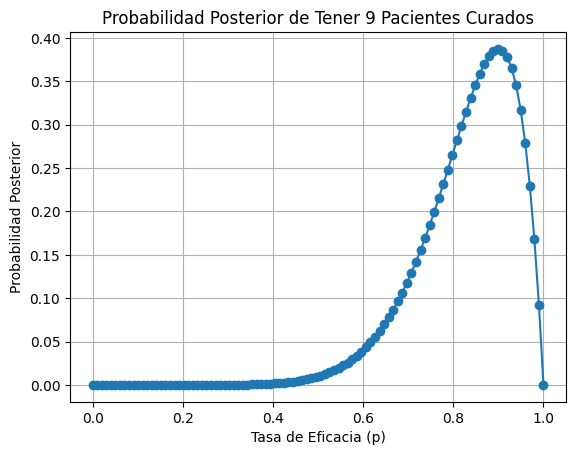

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Valores posibles de p (probabilidad de éxito)
p_values = np.linspace(0, 1, 100)  # Intervalos de 0.01

# Número de pacientes tratados
n = 10

# Número de pacientes curados
k = 9

# Calculamos la probabilidad posterior para cada valor de p
probabilidades_posteriores = []

for p in p_values:
    prob_posterior = (np.math.comb(n, k)) * (p**k) * ((1 - p)**(n - k))
    probabilidades_posteriores.append(prob_posterior)

# Graficamos la probabilidad posterior
plt.plot(p_values, probabilidades_posteriores, marker='o', linestyle='-')
plt.xlabel('Tasa de Eficacia (p)')
plt.ylabel('Probabilidad Posterior')
plt.title('Probabilidad Posterior de Tener 9 Pacientes Curados')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

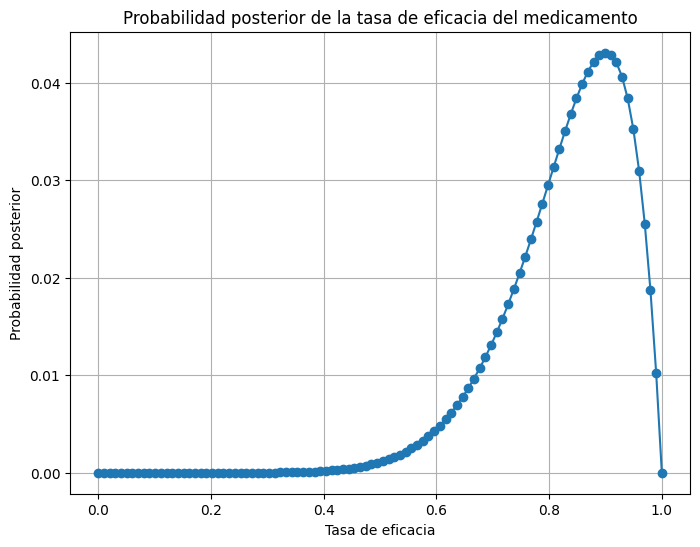

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Parámetros de la distribución binomial
n = 10  # número de ensayos
k = 9   # número de éxitos

# Crear una malla de valores para la tasa de eficacia
p_grid = np.linspace(0, 1, 100)

# Calcular la probabilidad binomial para cada valor en la malla
binom_prob = comb(n, k) * (p_grid**k) * ((1-p_grid)**(n-k))

# Normalizar las probabilidades
binom_prob /= np.sum(binom_prob)

# Graficar las probabilidades
plt.figure(figsize=(8, 6))
plt.plot(p_grid, binom_prob, marker='o')
plt.title('Probabilidad posterior de la tasa de eficacia del medicamento')
plt.xlabel('Tasa de eficacia')
plt.ylabel('Probabilidad posterior')
plt.grid(True)
plt.show

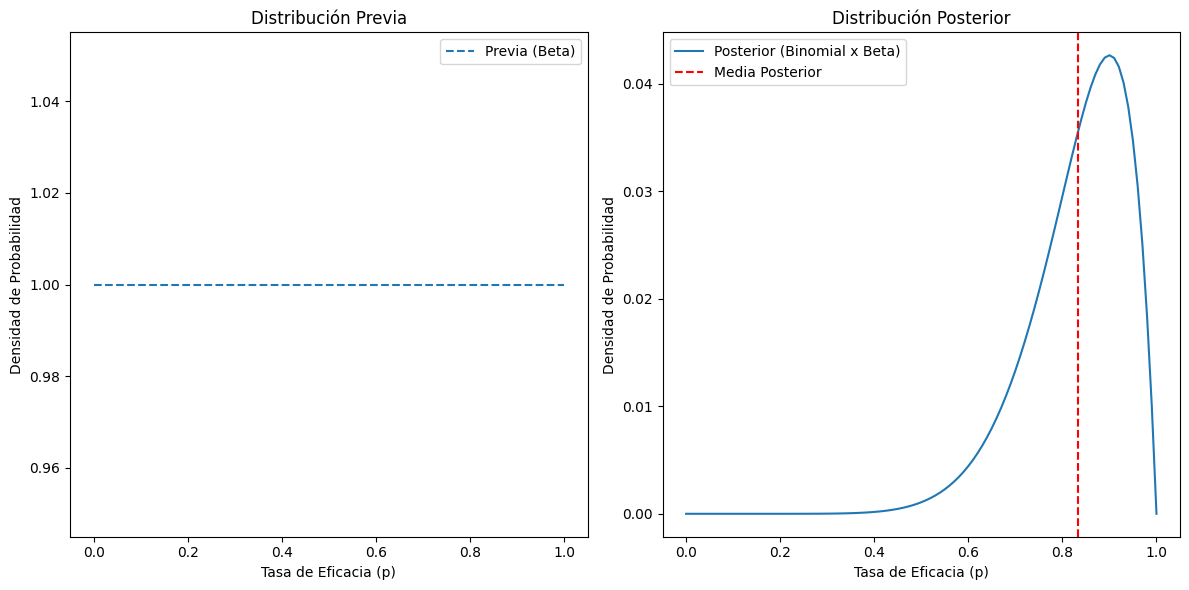

Estimación Previa de la Tasa de Eficacia: 0.50
Estimación Posterior de la Tasa de Eficacia: 0.83


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Número de pacientes tratados y pacientes curados
n = 10
k = 9

# Valores posibles de p (probabilidad de éxito)
p_values = np.linspace(0, 1, 101)  # Intervalos de 0.01

# Parámetros de la distribución previa Beta (no informativa)
alpha_prior = 1
beta_prior = 1

# Calculamos la distribución previa Beta
prior_distribution = beta(alpha_prior, beta_prior)

# Calculamos la probabilidad previa para cada valor de p
prior_probabilities = prior_distribution.pdf(p_values)

# Calculamos la probabilidad posterior utilizando la distribución binomial
likelihood = (np.math.comb(n, k)) * (p_values**k) * ((1 - p_values)**(n - k))
posterior_unnormalized = prior_probabilities * likelihood

# Normalizamos la probabilidad posterior
posterior_normalized = posterior_unnormalized / np.sum(posterior_unnormalized)

# Estimación previa y posterior de la tasa de eficacia
prior_mean = (alpha_prior) / (alpha_prior + beta_prior)
posterior_mean = np.sum(p_values * posterior_normalized)

# Graficamos la probabilidad previa y posterior
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(p_values, prior_probabilities, label='Previa (Beta)', linestyle='--')
plt.xlabel('Tasa de Eficacia (p)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Previa')
plt.legend()

plt.subplot(122)
plt.plot(p_values, posterior_normalized, label='Posterior (Binomial x Beta)')
plt.axvline(x=posterior_mean, color='red', linestyle='--', label='Media Posterior')
plt.xlabel('Tasa de Eficacia (p)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Posterior')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Estimación Previa de la Tasa de Eficacia: {prior_mean:.2f}")
print(f"Estimación Posterior de la Tasa de Eficacia: {posterior_mean:.2f}")


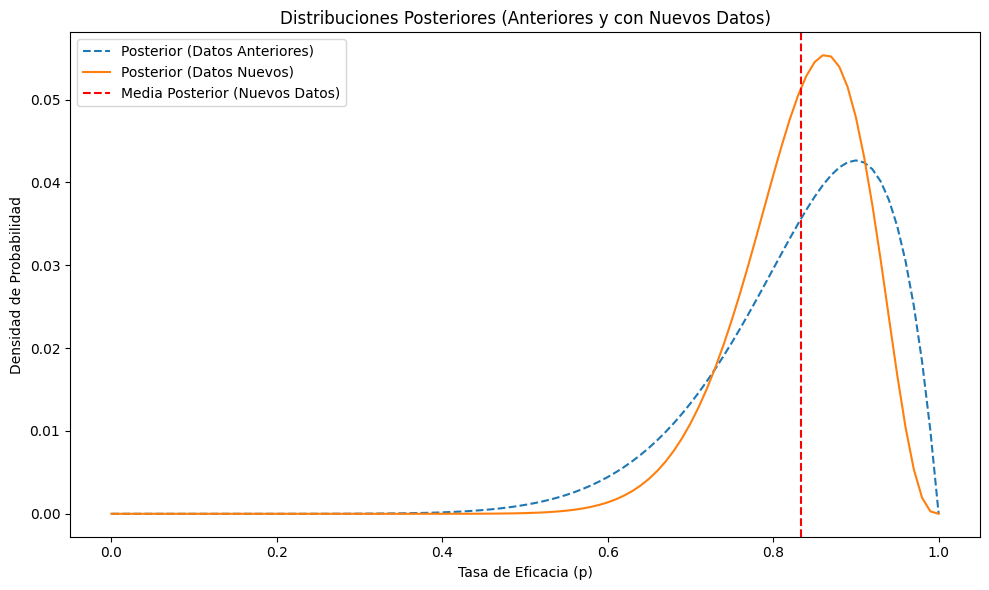

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Número de pacientes tratados y pacientes curados (nuevos datos)
n_new = 12
k_new = 10

# Valores posibles de p (probabilidad de éxito)
p_values = np.linspace(0, 1, 101)  # Intervalos de 0.01

# Parámetros de la distribución previa Beta (no informativa)
alpha_prior = 1
beta_prior = 1

# Calculamos la distribución previa Beta
prior_distribution = beta(alpha_prior, beta_prior)

# Calculamos la probabilidad previa para cada valor de p
prior_probabilities = prior_distribution.pdf(p_values)

# Calculamos la probabilidad posterior anterior (con los datos anteriores)
likelihood = (np.math.comb(n, k)) * (p_values**k) * ((1 - p_values)**(n - k))
posterior_unnormalized = prior_probabilities * likelihood

# Normalizamos la probabilidad posterior anterior
posterior_normalized_previous = posterior_unnormalized / np.sum(posterior_unnormalized)

# Actualizamos la probabilidad posterior con los nuevos datos
likelihood_new = (np.math.comb(n_new, k_new)) * (p_values**k_new) * ((1 - p_values)**(n_new - k_new))
posterior_unnormalized_new = posterior_normalized_previous * likelihood_new

# Normalizamos la nueva probabilidad posterior
posterior_normalized_new = posterior_unnormalized_new / np.sum(posterior_unnormalized_new)

# Graficamos las dos distribuciones posteriores juntas
plt.figure(figsize=(10, 6))
plt.plot(p_values, posterior_normalized_previous, label='Posterior (Datos Anteriores)', linestyle='--')
plt.plot(p_values, posterior_normalized_new, label='Posterior (Datos Nuevos)', linestyle='-')
plt.axvline(x=np.sum(p_values * posterior_normalized_new), color='red', linestyle='--', label='Media Posterior (Nuevos Datos)')
plt.xlabel('Tasa de Eficacia (p)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribuciones Posteriores (Anteriores y con Nuevos Datos)')
plt.legend()
plt.tight_layout()
plt.show()


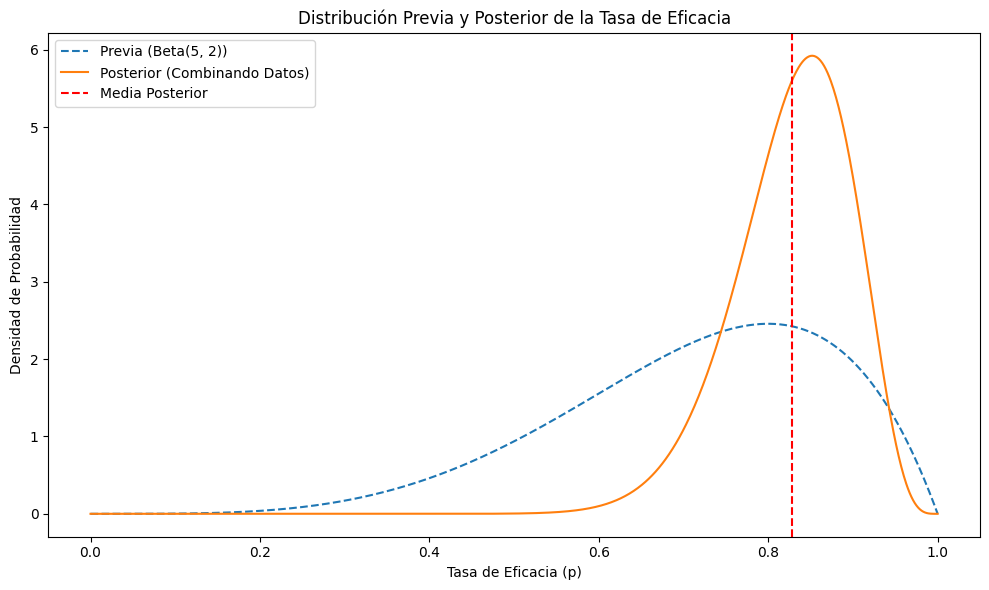

Media Posterior de la Tasa de Eficacia: 0.83


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Número de pacientes tratados y pacientes curados (datos de ambos experimentos)
n_total = 10 + 12
k_total = 9 + 10

# Parámetros de la distribución previa Beta
alpha_prior = 5
beta_prior = 2

# Calculamos los parámetros de la distribución posterior
alpha_posterior = alpha_prior + k_total
beta_posterior = beta_prior + (n_total - k_total)

# Creamos la distribución previa y posterior Beta
prior_distribution = beta(alpha_prior, beta_prior)
posterior_distribution = beta(alpha_posterior, beta_posterior)

# Valores posibles de p (probabilidad de éxito)
p_values = np.linspace(0, 1, 1001)  # Intervalos de 0.001

# Probabilidades previas y posteriores
prior_probabilities = prior_distribution.pdf(p_values)
posterior_probabilities = posterior_distribution.pdf(p_values)

# Graficamos la distribución previa y posterior
plt.figure(figsize=(10, 6))
plt.plot(p_values, prior_probabilities, label='Previa (Beta(5, 2))', linestyle='--')
plt.plot(p_values, posterior_probabilities, label='Posterior (Combinando Datos)', linestyle='-')
plt.axvline(x=alpha_posterior / (alpha_posterior + beta_posterior), color='red', linestyle='--', label='Media Posterior')
plt.xlabel('Tasa de Eficacia (p)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Previa y Posterior de la Tasa de Eficacia')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Media Posterior de la Tasa de Eficacia: {alpha_posterior / (alpha_posterior + beta_posterior):.2f}")


In [7]:
# Media de la distribución posterior de la tasa de eficacia
p_media = alpha_posterior / (alpha_posterior + beta_posterior)

# Número total de personas infectadas
total_personas_infectadas = 100000

# Calculamos el número estimado de personas curadas
personas_curadas = p_media * total_personas_infectadas

print(f"Estimación de personas curadas: {int(personas_curadas)}")


Estimación de personas curadas: 82758


In [12]:
from scipy.stats import beta

# Mediana de la distribución posterior de la tasa de eficacia
mediana_posterior = beta.ppf(0.5, alpha_posterior, beta_posterior)

# Número total de personas infectadas
total_personas_infectadas = 100000

# Calculamos el número mínimo de personas curadas con un 50% de probabilidad
personas_curadas_minimo = mediana_posterior * total_personas_infectadas

print(f"Número mínimo de personas curadas con 50% de probabilidad: {int(personas_curadas_minimo)}")


Número mínimo de personas curadas con 50% de probabilidad: 83516


In [17]:
from scipy.stats import beta
import numpy as np
from scipy.optimize import minimize

# Función para calcular la densidad posterior acumulativa
def posterior_cdf(p, alpha, beta):
    return beta.cdf(p, alpha, beta)

# Nivel de probabilidad deseado (90% en este caso)
level = 0.9

# Encontrar el intervalo HPD que cumple con el nivel de probabilidad
interval = minimize(lambda p: -(posterior_cdf(p[1], alpha_posterior, beta_posterior) - posterior_cdf(p[0], alpha_posterior, beta_posterior)), [0, 1], bounds=[(0, 1)])

# Número total de personas infectadas
total_personas_infectadas = 100000

# Calculamos el número mínimo de personas curadas con 90% de probabilidad (HPD 90%)
p_min, p_max = interval.x
personas_curadas_minimo_90 = (p_min + p_max) / 2 * total_personas_infectadas

print(f"Número mínimo de personas curadas con 90% de probabilidad (HPD 90%): {int(personas_curadas_minimo_90)}")




AttributeError: 'int' object has no attribute 'cdf'

In [18]:
from scipy.stats import beta
import numpy as np
from scipy.optimize import minimize

# Función para calcular la densidad posterior acumulativa
def posterior_cdf(p, alpha, beta):
    return beta(alpha, beta).cdf(p)

# Nivel de probabilidad deseado (95% en este caso)
level = 0.95

# Encontrar el intervalo HPD que cumple con el nivel de probabilidad
interval = minimize(lambda p: -(posterior_cdf(p[1], alpha_posterior, beta_posterior) - posterior_cdf(p[0], alpha_posterior, beta_posterior)), [0, 1], bounds=[(0, 1)])

# Obtenemos los límites del intervalo HPD con 95% de probabilidad
p_min, p_max = interval.x

print(f"Con un 95% de probabilidad, la tasa de eficacia del medicamento se encuentra entre {p_min:.2f} y {p_max:.2f}")


TypeError: 'int' object is not callable